In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [3]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [26]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

model = StandardScaler()
normalized_data = model.fit_transform(df_market_data)
normalized_df = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)
normalized_df.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

In [10]:
# Create a DataFrame with the scaled data

scaled_df = pd.DataFrame(normalized_df.values, columns=normalized_df.columns)

# Copy the crypto names from the original DataFrame

scaled_df['coin_id'] = df_market_data.index

# Set the coin_id column as index

scaled_df.set_index('coin_id', inplace=True)

# Display the scaled DataFrame

scaled_df.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [35]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1,12))

In [36]:
# Create an empty list to store the inertia values

import numpy as np
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in range(1,12):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

In [37]:
# Create a dictionary with the data to plot the Elbow curve

elbow = {'k':k_values, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow)

elbow_df

k     inertia
0    1  287.000000
1    2  232.054230
2    3  165.185408
3    4   79.022435
4    5   71.276625
5    6   62.732880
6    7   49.097847
7    8   45.742867
8    9   33.364919
9   10   28.869967
10  11   25.257434

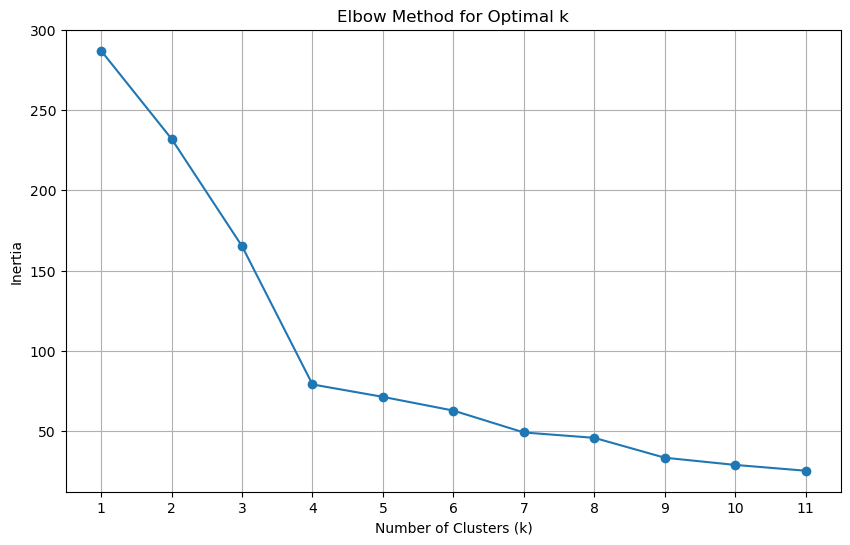

In [40]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xticks(elbow_df['k'])  # Set x-ticks to be the k values
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The elbow begins at 4, making 4 the best value for k.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [16]:
# Initialize the K-Means model using the best value for k

kmeans_best = KMeans(n_clusters=4)

In [17]:
# Fit the K-Means model using the scaled DataFrame

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame

clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.

print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 1 2 2 0 3
 2 2 2 2]


In [20]:
# Create a copy of the scaled DataFrame
copy_df = df_normalized.copy()

In [21]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

df_normalized['cluster'] = model.labels_

# Display the copy of the scaled DataFrame
copy_df.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

In [33]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas

scatter_plot = df_normalized.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id'],
    cmap='Set1',
    title='Cryptocurrency Clusters'
)


scatter_plot


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [43]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
print(pca_data)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [45]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_var = pca.explained_variance_ratio_
total_var = explained_var.sum()
total_var

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984

In [47]:
# Create a new DataFrame with the PCA data.

pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original scaled DataFrame

pca_df['coin_id'] = scaled_df.index 

# Set the coin_id column as index

pca_df.set_index('coin_id', inplace=True)  

# Display the scaled PCA DataFrame

pca_df.head()

PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [48]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1,12))

In [49]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(pca_df) 
    inertia.append(kmeans.inertia_)


In [50]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df2 = pd.DataFrame(elbow_data)


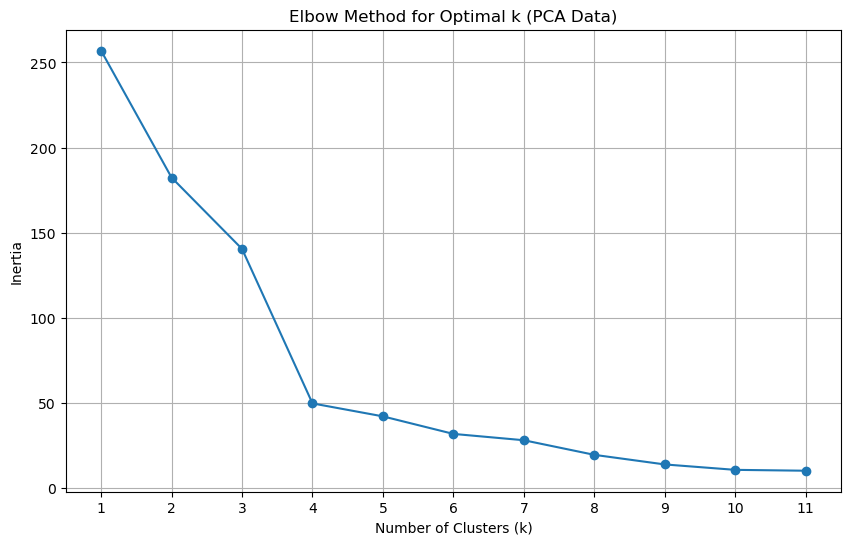

In [52]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df2['k'], elbow_df2['inertia'], marker='o')
plt.xticks(elbow_df2['k'])  # Set x-ticks to be the k values
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.grid()
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA state is where the inertia starts to fall off / a steep decrease


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This does differ from the original data. In the original data, the best value for k was calculated at 4, whereas the PCA data indicates 3. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [53]:
# Initialize the K-Means model using the best value for k

kmeans = KMeans(n_clusters=3, random_state=42)


In [54]:
# Fit the K-Means model using the PCA data

kmeans.fit(pca_df)


KMeans(n_clusters=3, random_state=42)

In [57]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

kmeans_predictions = kmeans.predict(pca_df)

# Print the resulting array of cluster values.

print(kmeans_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 2 1
 2 2 2 2]


In [59]:
# Create a copy of the scaled PCA DataFrame

pca_clusters_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

pca_clusters_df['cluster'] = kmeans_predictions

# Display the copy of the scaled PCA DataFrame
pca_clusters_df.head()

PCA1      PCA2      PCA3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0

In [62]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas 

scatter_plot1 = pca_clusters_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='cluster',
    hover_cols=['coin_id']
)
scatter_plot1


:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [68]:
# Composite plot to contrast the Elbow curves
original_elbow_curve = elbow_df.hvplot.line(
    x='k',
    y='inertia',
    label='Original Scaled Data',
    color='red',
    title='Comparison of Elbow Curves'
)

pca_elbow_curve = elbow_df2.hvplot.line(
    x='k',
    y='inertia',
    label='PCA Scaled Data',
    color='blue'
)

# combine the plots
composite_elbow_plot = (original_elbow_curve * pca_elbow_curve).opts(
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

# display the data
composite_elbow_plot

:Overlay
   .Curve.Original_Scaled_Data :Curve   [k]   (inertia)
   .Curve.PCA_Scaled_Data      :Curve   [k]   (inertia)

In [72]:
# Composite plot to contrast the clusters

original_clusters_plot = df_normalized.hvplot.scatter(
    x='price_change_percentage_24h',  
    y='price_change_percentage_7d',  
    by='cluster',  
    title='Clusters from Original Scaled Data',
    color='red'
)

# Scatter plot for PCA scaled data
pca_clusters_plot = pca_clusters_df.hvplot.scatter(
    x='PCA1',  
    y='PCA2',  
    by='cluster',  
    title='Clusters from PCA Scaled Data',
    color='blue'
)

composite_clusters_plot = (original_clusters_plot * pca_clusters_plot).opts(
    xlabel='price_change_percentage_24h / PC1',
    ylabel='price_change_percentage_7d / PC2'
)

# Display the composite plot
composite_clusters_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Fewer clusters mean a more simplified clustering process. We still get the desired results with fewer clusters, but it is easier on the eyes (especially for those without familiarity). The downside to fewer clusters is the potential for loss of key information that can affect the accuracy of the clusters. Finding a happy medium in these situations is important to ensure accuracy and maintain simplicity. 